In [1]:
from brian2 import *
import NeuronEquations
import BrianHF

In [2]:
start_scope()
grid_size_x = 3
grid_size_y = 3

N_Neurons = grid_size_x * grid_size_y # Number of neurons

# Neuron Parameters
tau = 10*ms # Time constant
vt = 15*mV # Threshold Voltage
vr = 0*mV # Reset Voltage
v0 = 20*mV # Resting Voltage - Not necessarily used
gL = 1/ms # Leak Conductance - Not necessarily used

# Neuron Equation
Eqs_Neurons = NeuronEquations.EQ_LIF


# Synapse Parameters
K_GABA = 1
K_AMPA = 10
taugd =  5 * ms
tauad =  2 * ms
taugr =  0.25 * ms
tauar =  0.4 * ms

In [3]:
indices = array([4, 5])
times = array([1, 15])*ms
G_Spikes = SpikeGeneratorGroup(N_Neurons, indices, times)

In [4]:
G_Neurons = NeuronGroup(N_Neurons, Eqs_Neurons, threshold='v>vt', reset='v = vr', refractory=1 * ms, method='euler')

# Generate x and y values for each neuron
x_values = np.repeat(np.arange(grid_size_x), grid_size_y)
y_values = np.tile(np.arange(grid_size_y), grid_size_x)

# Assign x, y, and z values to each neuron
G_Neurons.X = x_values
G_Neurons.Y = y_values

In [5]:
# Creating the synapses
Syn_Input_Neurons = Synapses(G_Spikes, G_Neurons, 'w : volt/second', on_pre='Ia1 += w')
Syn_Neurons_GABA = Synapses(G_Neurons, G_Neurons, 'w : volt/second', on_pre='Ig1 -= w')
Syn_Neurons_AMPA = Synapses(G_Neurons, G_Neurons, 'w : volt/second', on_pre='Ia1 += w')

# SYNAPSE CONNECTIONS:
# Connect the first synapses from input to G_neurons on a 1 to 1 basis
Syn_Input_Neurons.connect(condition= 'i==j')
# Connect the second group of synapses from a neuron to its neighbors
Syn_Neurons_GABA.connect(condition='i != j and abs(X_pre - X_post) <= 1 and abs(Y_pre - Y_post) <= 1')
# Connect the last set of synapses from a neuron to itself (recurrent)
Syn_Neurons_AMPA.connect(condition='i == j')

# Define the weights of the synapses
Syn_Input_Neurons.w = 80 * volt/second
Syn_Neurons_GABA.w = 30 * volt/second
Syn_Neurons_AMPA.w = 65 * volt/second

In [6]:
# Monitor the spikes
SpikeMon_Input = SpikeMonitor(G_Spikes)
SpikeMon_Neurons = SpikeMonitor(G_Neurons)

# Monitor the state variables
StateMon_Neurons = StateMonitor(G_Neurons, ['v', 'Ia1', 'Ig1'], record=True)
v_trace = StateMonitor(G_Neurons, 'v', record=True)

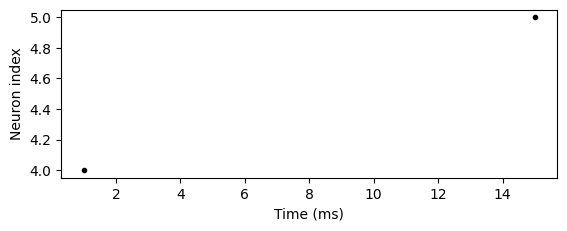

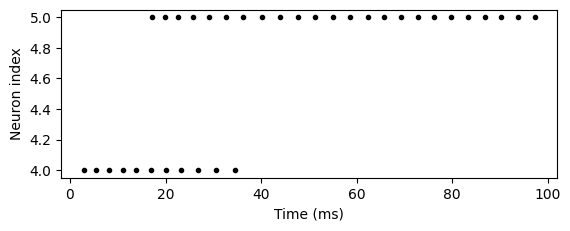

In [7]:
# Run the simulation
run(100*ms)

# Plot the results
figure()
subplot(211)
plot(SpikeMon_Input.t/ms, SpikeMon_Input.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

# Plot the results
subplot(212)
plot(SpikeMon_Neurons.t/ms, SpikeMon_Neurons.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

AttributeError: module 'BrianHF' has no attribute 'visualise_states'